# COGS 118A Final Project - G042

# Austin Crime Clearance Status Prediction

# Names

- Xing Hong A15867895, xihong@ucsd.edu
- Xiangyi Kong A16138343 xkong@ucsd.edu
- Luning Yang A16158834 l4yang@ucsd.edu
- Yunyi Huang A15813745 yuh022@ucsd.edu 
- Annie Fan A15932544 c7fan@ucsd.edu 

# Abstract 
- Proposed Problem:

***Are there any clear crime type, seasonal, hourly correlations in clearance status?***

***How will we use data time, crime type information to predict(classify) clearance status?***

- Data and Measurement: 

Data consists of 159K samples, 18 columns on type of crime reported, location by various attributes (lat/lon, council district, census tract) and time are included. Clearance status by Austin PD is also recorded where available. Measurement consists of timestamp, categorical, numerical data for different columns. 

- Data Usage: (What will we do)

We will first address the correlation between crime type, date time information and clearance status by using correlation tests and independent tests. Then, we will construct different new features based on how we define the time segments for training prediction models. If the trend and correlation is clear, we can train can compare different classification models. 

- Performance measurement:

The models’ performance will be evaluated based on our metrics. After we trained several models, we can compare them by using different criteria, for example accuracy, precision, ROC, AUC, etc..


# Background

Crime is a social problem that has been obsessing the people in the United States, and from time to time, this problem seems to become more and more severe. There are a lot of factors that would increase the crime rate, and these includes: poverty level and job availability, social level of morality, police policy, and age of the population, etc <a name="anote"></a>[<sup>[1]</sup>](#anote) . They seem to be reasonable, because if the poverty level is high and the job availability is low, people will start to commit crimes in order to access the needs they are not able to afford through the legal way. Also, the tolerance level of immorality is high in some communities, which increases the crime eventually. Furthermore, if there is a lack in police force, there would be more space for people to commit crimes. 
 
When crimes happen, one of the most important thing is to resolve the crime, either by arrect or exceptional means, which is called clearance in professional fields <a name="bnote"></a>[<sup>[2]</sup>](#bnote) . Some crimes are cleared within a short time like a couple months, while some crimes are cleared after a long time which takes several years, even remain unresolved after decades. Why does it happen? Are there any features of the crimes make some of them be cleared very quickly?
	
A study in Quebec, Canada focused on the similar topic suggested that the likelihood of a crime to be cleared is closely linked to the efficacy of the police departments, and it will be more likely to be cleared if the crime was commited in a wealthy community <a name="cnote"></a>[<sup>[3]</sup>](#cnote). In short, the crime clearance is tied to the location of the crime. Another study focusing on the clearance of homicides, asserted that the likelihood of a crime to be cleared might be related to the offender’s demographics, drug use, and crime location, etc <a name="dnote"></a>[<sup>[4]</sup>](#dnote). 
 
In this project, we would like to find out what characteristics of a crime case are likely causing the case to be cleared and build a predictor/classifier model. We will target the city of Austin, TX and perform machine learning on its data to answer the research questions we have stated in the previous section. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

The problems we will be focusing on are the following:

***Are there any clear crime type, seasonal, hourly correlations in clearance status?***

***How will we use data time (continues quantity/discrete categories), crime type information(discrete categories) to predict(classify) clearance status?***

The problem will be split into two: finding/proving correlation (statists), and classification (modeling). Given our definition of the problem, we can utilize the data by segmenting date time information, grouping crime types. Therefore, it is possible that we can use correlation, independence tests finding and proving the connection with clearance status (Not Cleared, Cleared by Arrest, Cleared by Exception, etc.) If the trend is clear, then we will further explore what will be the best division of time, as well as whether there is an issue of unbalanced data. T

Another thing to consider is that, time is given in the form of a unified, we need to extract specific seasonal and daily information from it. Due to the nature of the crime, time itself may not be accurate, we need more analysis in specific situations.

Ultimately, we will build our models for classification and predict the clearance status based on our constructed features. The type of crime also need to consider, given that it contains a variety of categories, some of these categories are similar, some are very different, we need to consider which to be combined and which to be cancled before classification. This can also lead to a large number of null values, which are common in recommender systems, especially when there are many categories. Therefore, when creating time period information and crime types, we need to keep an eye on the number of samples in each category. Furthermore, we also need to build specialized variables to participate in training for the types we haven't seen in order to avoid the problem of model failing in real-world predictions.

## Hypothesis

We hypothesize that there will be clear correlations between seasonal, hourly, crime types information and clearance status. Furthermore, it is possible for us to train a sophisticated classification model that can predict the clearance status based on given information.

We decided to have this topic given the worries of the climbing crime rate. Some crimes are cleared within a short time like a couple of months, while some crimes are cleared after a long time which takes several years, and even remain unresolved after decades. We want to address the following questions: Why does it happen? Are there any features of the crimes that make some of them be cleared very quickly? With a deeper understanding of the factors that can affect crime clearance, we can improve the current efficiency by focusing on more specific targets.

## Significance

In this project, we would like to find out what characteristics of a crime case are likely causing the case to be cleared and build a predictor/classifier model. We will target the city of Austin, TX and perform machine learning on its data to answer the research questions we have stated in the previous section. This classifier helps us better understand the nature of crime in the region, thus discuss the different factors for crime prevention, how does it happen, and the influence of clearance. From the administrative level, which will help to improve the work efficiency of the local police, and thus finding management loopholes. From a social science point of view, this can provide us with a new perspective on the judicial system, that is, time, the impact of seasonal factors on judicial action.

# Data

The data we used is acquired from Kaggle, the link is https://www.kaggle.com/datasets/jboysen/austin-crime. The dataset is about individual crimes reported in Austin, primarily 2014-2015. There is a total of 159k rows of data and 18 variables on type of crime reported, location by various attributes (lat/lon, council district, census tract) and time are included. Clearance status by Austin PD is also recorded where available.

- Each observation contains an address(the postal address), census_tract(the census location), clearance_date(time of clearance), clearance_status(cleared by arrest, not cleared, etc), council_district_code(Austin council district code), description(low-level description of crime), district(Austin city district), latitude(geospatial latitude coord), location(latitude, longitude), location_description(street address), longitude(geospatial longitude coordinate), primary_type(high-level description of crime), timestamp(time of report in the form of YYYY-MM-DD HH:MM:SS), unique_key(Austin record key), x_coordinate(city coordinate, not same as lat/lon), y_coordinate(city coordinate, not same as lat/lon), year(year of report, YYYY, 2014-2016), zipcode(postal zip code)

Some of the critical variables that we will be using are:  
- clearance_date(time of clearance)
- description(low-level description of crime)
- primary_type(high-level description of crime)
- timestamp(time of report in the form of YYYY-MM-DD HH:MM:SS)
- clearance_status(cleared by arrest, not cleared, cleared by exception, etc)

We will be using these variables to solve our classfication problem by predict one's clearance result. 

There will be some data cleaning done before we dive into the classfication problem. First, we will be creating a new categorical feature: seasonal_feature(Spring, Summer, Fall, Winter) from timestamp. Then we will make a scatter plot to view the distribution of different kinds of clearance status. Then we made a heatmap to observe if there are any kinds of correlation between clearance status and clear crime type, seasonal, hourly trends. Furthermore, we madea a bar plot in order to visualize the amount of cases for different clearance status. However, one of the problems we encountered while working on the first question is hourly data cannot be created based on the provided dataset as we dig more into the dataset. Majority of the data provided are in the form of 'year-month-date 00:00:00' or some random number which couldnot be interpreted as of now. So we decided to leave this question for now and thinking about not observing the trend between hourly feature and clearance status.

# Proposed Solution

- ***Are there any clear crime type, seasonal, hourly correlations in clearance status?***

We will be performing EDA on the given dataset and mainly using correlation matrix to see if there are any clear relationship between crime type, seasonal, hourly trends in clearance status.
We will test the relationship with a chi-square test.
This is essential as we later predict the clearance status as it could help us determine what features should be more weighted and what features are not so important in our further prediction.
Potential use of Library: Pandas, Numpy, Scikit-Learn, Matplot

- ***How will we use data time, crime type information to predict(classify) clearance status?***

We will do a train/test split on our dataset and use supervised machine learning algorithms like Decision Tree Regressor to see how our model performs and set this as a baseline model.
Then we can start using Random Forest Regression to predict one’s clearance status based on crime type, seasonal_feature(new_feature), hourly_feature(new_feature) with hyperparameter tuning to further improve our model’s performance.
We will be using supervised machine learning algorithms like K-nearest Neighbors/Support Vector Machine to view if there are any hidden relationship between crime type, seasonal, hourly trends in clearance status to better classify clearance status.
Model’s performance could be determined by accuracy, precision, ROC, AUC, etc.. 
Potential use of Library: Pandas, Numpy, Scikit-Learn, Matplot


# Evaluation Metrics (NEED MODIFICATION)

In our classification tasks, we will evaluate our models by comparing the multiclass evaluation metrics as the following:

- Accuracy score:
- F-1 Score
- AUC

$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $

Under multiclass classification, accuracy score will be defined as the proportion of correct predicted sample in test set.

$ \text{F-1 Score} = \frac{2\times{Precision}\times{Recall}}{Precision+Recall} $
In our project, F-1 Score will be calculated in macro form, such that it can be more sensitive to imbalance.

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. For this project, AUC will be calculated in One vs. rest form, such that it will be more sensitive to the imbalance prediction.

Given the imbalance nature of our data, the above metrics will be used to evaluate the model performance. By comparing results of different metrics, we can evaluate our models more thoroughly. We use accuracy to measure how well our model is able to put a crime record into the correct clearance status. However, accuracy might not be ideal for a dataset with disproportional clearance status.In this case, we will use alternative metrics such as F-1 socre and AUC. These two metrics are good at detecting whether a model can predict a category with small proportion in the dataset correctly. For example, if the dataset only contains a small proportion of a certain clearance status but we really care about whether we can predict that status correctly.  

# Result

# Correlation Tests (NEED CONTENT)

## Model Selection
- Data Cleaning & Feature Selection:
    + We discovered that information in ***address, location, zipcode, latitude, longitude, and location_description*** are overlapped and intercorrelated as they all show the exact location of the crime scene. We decided to only use ***latitude and longitude*** to represent the location information.
    + We used the standardized version or ***x_coordinate and y_coordinate***.
    + We left out ***unique_key*** as we condiderred the record key information was less relatable and helpful to our classification task
    + There are a lot of missing values in ***clearance_date and timestamp*** so we combined the time information in ***year, month, season***.
    + We filled the missing values in the rest of the columns with 0.
    + After cleaning, the features we chose for our model are ***census_tract, council_district_code, description, district, latitude, longitude, primary_type, year, month, season, x_standardized, y_standardized***
              
- Feature Engineering
    + Prior to traning our models, we one-hot encoded all columns that contained categorical information. 
    + Created a new feature named season for seasonal data which derived from the variable time.

- Baseline Model
    + We fit a logistic regression model as our baseline model. With default parameters, our baseline model achieved 83% accuracy on both the training set and testing set. This result showed our selected features were suitable for classifying crime clearance type and solving our problem statement. One note from this baseline model is that it did not converge well and the testing accuracy was slightly higher than training accuracy. Therefore, we needed further improvement on our baseline model.
    + Next, we performed grid search on our baseline model with parameters {c:[0.01,0.5,1,10]}. We observed that the model accuracies were very consistent accross multiple test split and across different settings of C. After grid search, the model's accuracy on the training and testing set was still 83%.
    
- Other Model
    + We experimented with other classification models with default parameters including Decision Tree, SVM, KNN, Multi-layer Perceptron, and Random Forest. Here is a summary of the performance of all models.
    
| Model| Train Accuracy | Test Accuracy |
| --- | --- | --- |
| Logistic Regression  | .83 | .83 |
| Logistic Regression(After Grid Search)  | .83 | .83 |
| Decision Tree Classifier  | .96 | .81 |
| SVM  | .82 | .83 |
| KNN  | .87 | .84 |
| Multi-Layer Perceptron  | .82 | .83 |
| Random Forest Classifier  | .96 | .85 |
| LightGBM  | .87 | .86 |


## Grid Search (NEED MORE CONTENT)
Given the above result, we will choose __ndom Forest Classifier__ and __LightGBM__ for their high potential. In this project, we will use Random Search on 3 fold cross valition to find the optimal hyperparameters set for each algorithms. Namely, top three set of hyperparameters with the highest accuracy for Random Forest and LightGBM will be saved for further statistical tests respectively. 

Particularly, for Random Forest Classifier we will randomly choose 100 out of 12000 combinations, while for LightGBM we will choose 1000 out of 506250 combinations.

## Cross Validation & Null Hypothesis Tests (NEED MORE CONTENT)

As we saved the top 3 hyperparameter sets for each algorithm, by using them for 5x5 repeated cross validation, we can have 25 results for each metrics per algorithm, which we can conduct null hypothesis on each distribution to prove significance. Given that we have 3 models for each algorithm, unpaired t-test and Wilcoxon signed-rank test have been conducted by comparing each pair. In other words, we first compare each models within the same algorithm, find the most statistically significant one with a beter perfomance given our metrics, then using its repeated cross validation result to compare with another algorithm. 

1) __Random Search RF top 3 models -> Repeated Cross Validation -> Null Hypothesis Test -> Choose the best RF model - Model A__

2) __Random Search LGBM top 3 models -> Repeated Cross Validation -> Null Hypothesis Test -> Choose the best LGBM model - Model B__

3) __Null Hypothesis Test between Model A & B -> Choose the best prediction model__

Our stepwise results are shown below, where significantly high result will be marked with "!":

| Model| Mean Accuracy | Mean F1 | Mean AUC |
| --- | --- | --- | --- |
| RF_1  | .86 | .50 | 0.83 |
| RF_2  | .86 | .50 | 0.83 |
| RF_3  | .86 | .51 (!) | 0.82 (!) |

| Model| Mean Accuracy | Mean F1 | Mean AUC |
| --- | --- | --- | --- |
| LGBM_1  | .86 | .52 | 0.83 |
| LGBM_2  | .86 | .51 | 0.84 |
| LGBM_3  | .86 | .52 | 0.83 |

| Model| Mean Accuracy | Mean F1 | Mean AUC |
| --- | --- | --- | --- |
| RF_3  | .86 | .51 | 0.82 |
| LGBM_1  | .86 | .52 (!) | 0.83 (!)|

___

Mean Accuracy RF: 0.8627125275601369 , 0.8629262189874689 , 0.8625885471084086

Mean F1 RF: 0.5043843606494408 , 0.5042854171922214 , 0.5117423527376923

Mean AUC RF: 0.8288699123470801 , 0.8288092026744758 , 0.8265966939111224
___
Mean Accuracy LGBM: 0.8626993130291386 , 0.8633034100747782 , 0.8626571050228073

Mean F1 LGBM: 0.5153069120924371 , 0.5137013598671254 , 0.5162583970675714

Mean AUC LGBM: 0.8331112895325244 , 0.8353402835651383 , 0.8335189545838935


According to the result of our 5x5 repeated cross validation on our Random Forest and LGBM models, we conducted the unpaired t-test as well as Wilcoxon signed-rank test to prove the significant differences between their perfomances. To sum up, the accuracy have shown no significant differences between 2 models, however, LightGBM has a significant better F1 score and AUC. This proved that LightGBM model can well predict with less bias that can be potentially caused by our imbalanced dataset compared to Random Forest Classifier.

# Discussion - Annie, Yunyi

## Interpreting the result (NEED CONTENT)

## Limitations (NEED CONTENT)

## Ethics & Privacy
- Data collection

   + We need to ensure that the data collectors get informed consent from the participants while collecting the data. Although they may not obtain the consent from each individual criminal, the data may still be collected and analyzed for public interest. We don’t know the exact procedures for the data collection, so we make no comment here.

   + The biases of our data collection is not an issue to consider, since the data is collected by Austin PD and published by Kaggle. We believe our data is credible.

   + The dataset only contains information about the address, time, and crime type of each crime. There’s no Personal Identifiable Information (PII) such as age, gender, or height of each criminal. So we should not worry about exposing a person’s privacy.

- Data storage

   + This should not be an issue to consider, since we don’t store our data in our own local devices. Every time we run our project, we just need to pull the data from Kaggle. We should always be aware of the update of the data.

- Analysis

   + We need to ensure that our results are fully supported by our data. We should avoid manipulating (p-hacking) our data to make it in favor of our hypotheses. If there’s no special crime type, seasonal, hourly trends in clearance status, we won’t modify our data to create a trend. Moreover, if we fail to use information such as time or crime type to predict the clearance status, we should report it honestly. We should not exaggerate the correlation between the independent variables and the clearance status. 

   + We need to address the following questions before testing our hypothesis:
      * Are the records comprehensive, accurate and complete?
      * If there exists some incomplete or inaccurate records, how are we going to filter them out?
      * Does the government withhold some criminal records?
      * Does this dataset serve some political purposes such as degrading certain districts in Austin city?

- Modeling

   + Proxy discrimination: Since our dataset doesn’t contain any discriminatory variable such as race or gender, this should not be an issue for us to consider. 

   + Fairness across groups: We need to make sure our model result is fair across all districts in Austin city.

   + Explainability: We should explain our modeling procedures clearly and straightforwardly. 

   + Metric selection: We should use appropriate metrics to measure our model’s performance and be aware of its shortcomings. In our case, we will possibly use accuracy, precision, or recall to assess our clearance status classification performance.

   + Communicate bias: We should discuss the shortcomings and future improvements of our modeling. 

- Deployment

   + Redress: redress should not be a concern, since no PII are released in the dataset. We should not worry that participants could get hurt.

   + Concept drift: We should always update our model with the most recent data. We understand that the definitions of terms such as crime types or clearance can be changed over time. So we should adjust our model accordingly. 

   + Roll back: We need to make sure that our results will not discriminate against people in any particular district. If that happens, we should withdraw our research and revise it. 

   + Unintended use: we should clearly list our research purpose and limitations to prevent other entities from misusing our research result.

- Reproducibility and replicability

   + We will publish our research to a public github repository to make our research reproducible. Our people can reproduce our research by following our procedure. They might get a different result due to the update of the criminal records.

## Conclusion (NEED CONTENT)

# Footnotes
<a name="anote"></a>1.[^](#anote):  Thompson, J. (9 Dec 2018) Factors influencing the crime rate. Legal Beagle. https://legalbeagle.com/5969328-factors-influencing-crime-rate.html <br> 
<a name="bnote"></a>2.[^](#bnote):  Offenses Cleared. FBI. https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/clearances#:~:text=Cleared%20by%20exceptional%20means,In%20certain%20situations&text=The%20agency%20must%20have%3A,be%20taken%20into%20custody%20immediately. <br> 
<a name="cnote"></a>3.[^](#cnote):  Paré, P. P., Felson, R. B., & Ouimet, M. (2007). Community variation in crime clearance: A multilevel analysis with comments on assessing police performance. Journal of quantitative criminology, 23(3), 243-258. https://link.springer.com/article/10.1007/s10940-007-9028-0 <br> 
<a name="dnote"></a>4.[^](#dnote):  Wellford, C., & Cronin, J. (1999). An analysis of variables affecting the clearance of homicides: A multistate study. https://ncvc.dspacedirect.org/handle/20.500.11990/4057 <br> 

# Code and Graphs

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from lightgbm import LGBMClassifier
from lightgbm import Dataset

import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

from scipy import stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore") #supress warning

## Data Cleaning & Feature Engineering

### Clean data for training

####  Missing value imputation

In [84]:
df = pd.read_csv('austin_crime.csv')
df.head()

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0


#### Descriptive Statistics

In [85]:
df.describe(include='all')

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
count,159464,84528,81489,81480,8.445600e+04,84884,84871,34500.000000,34500,78172,34500.000000,79214,73544,7.354400e+04,7.227300e+04,7.227300e+04,73544.000000,73201.000000
unique,49070,573,6469,4072,NaN,46,53,NaN,14864,28897,NaN,18,730,NaN,NaN,NaN,NaN,NaN
top,Breaking & Entering,11,2015-12-08 00:00:00,Not cleared,NaN,THEFT,D,NaN,(30.338618-97.692566),1030 NORWOOD PARK BLVD,NaN,Theft,2015-07-24 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,5670,3761,289,62471,NaN,21782,11346,NaN,775,1352,NaN,28274,160,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.755481e+05,NaN,NaN,30.292623,NaN,NaN,-97.737027,NaN,NaN,1.810218e+10,3.115753e+06,1.008020e+07,2014.524489,78732.873390
std,NaN,NaN,NaN,NaN,2.520346e+06,NaN,NaN,0.075921,NaN,NaN,0.046538,NaN,NaN,2.037991e+10,1.487193e+04,2.857694e+04,0.499403,26.069126
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,30.088110,NaN,NaN,-97.958825,NaN,NaN,2.014200e+04,3.040396e+06,1.001032e+07,2014.000000,78610.000000
25%,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,30.232364,NaN,NaN,-97.760883,NaN,NaN,2.014320e+10,3.107626e+06,1.005777e+07,2014.000000,78719.000000
50%,NaN,NaN,NaN,NaN,5.000000e+00,NaN,NaN,30.278712,NaN,NaN,-97.733608,NaN,NaN,2.014505e+10,3.116518e+06,1.007602e+07,2015.000000,78744.000000
75%,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,30.353641,NaN,NaN,-97.704639,NaN,NaN,2.015500e+10,3.126112e+06,1.010260e+07,2015.000000,78752.000000


The missing values in each column indicates that for most columns -- near half of the rows have the missing values, including our label, clearance_status.

In [86]:
df.isnull().sum()

address                       0
census_tract              74936
clearance_date            77975
clearance_status          77984
council_district_code     75008
description               74580
district                  74593
latitude                 124964
location                 124964
location_description      81292
longitude                124964
primary_type              80250
timestamp                 85920
unique_key                85920
x_coordinate              87191
y_coordinate              87191
year                      85920
zipcode                   86263
dtype: int64

#### Graphical representation

In [87]:
df = df.dropna(subset=['clearance_status'])
df = df[df['clearance_status'].apply(lambda x: x in ['Not cleared', 'Cleared by Arrest','Cleared by Exception'])]
df['clearance_status'].value_counts()

Not cleared             62471
Cleared by Arrest       11275
Cleared by Exception     2073
Name: clearance_status, dtype: int64

In [88]:
def convert_datetime(x):
    try: 
        return pd.to_datetime(x)
    except:
        return np.nan

In [89]:
# add in a new feature month.
df['month'] = df['clearance_date'].apply(convert_datetime).dt.month

In [90]:
# new seasaonal feature -- category based on month -> season(fall, spring, summer, winter)
df['season'] = df['month'].apply(lambda x: 'winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' if x in [9, 10, 11] else np.NaN)

In [91]:
df.groupby(['clearance_status', 'season']).size().to_frame().reset_index().rename(columns={0:'count'}).pivot(index = 'season', columns = 'clearance_status')

count                                 
clearance_status Cleared by Arrest Cleared by Exception Not cleared
season                                                             
fall                          2629                  488       15234
spring                        2768                  509       15454
summer                        3063                  580       15958
winter                        2815                  496       15825

In [92]:
total_counts_df = df.groupby(['clearance_status']).size().to_frame().reset_index().rename(columns={0:'count'})
total_counts_df

,clearance_status,count
0,Cleared by Arrest,11275
1,Cleared by Exception,2073
2,Not cleared,62471


In [93]:
temp_df = df.groupby(['clearance_status', 'season']).size().to_frame().reset_index().rename(columns={0:'count'}).pivot(index = 'season', columns = 'clearance_status')
temp_df


count                                 
clearance_status Cleared by Arrest Cleared by Exception Not cleared
season                                                             
fall                          2629                  488       15234
spring                        2768                  509       15454
summer                        3063                  580       15958
winter                        2815                  496       15825

In [94]:
normalized_cleared_by_arrest_df = pd.DataFrame(temp_df['count']['Cleared by Arrest']/total_counts_df['count'][0])

In [95]:
normalized_cleared_by_exception_df = pd.DataFrame(temp_df['count']['Cleared by Exception']/total_counts_df['count'][1])

In [96]:
normalized_not_cleared_df = pd.DataFrame(temp_df['count']['Not cleared']/total_counts_df['count'][2])

In [97]:
normalized_df = pd.concat([normalized_cleared_by_arrest_df, normalized_cleared_by_exception_df,normalized_not_cleared_df], axis=1)
normalized_df

,Cleared by Arrest,Cleared by Exception,Not cleared
season,,,
fall,0.233171,0.235408,0.243857
spring,0.245499,0.245538,0.247379
summer,0.271663,0.279788,0.255447
winter,0.249667,0.239267,0.253318


Heatmap on the proportion between different clearance status and seasonal features. As we observed from the heatmap, during the summer, the number of crime signifantly weights more in the total number of crimes, vice versa, fall has the smallest weights in all season for total number of crimes. 

<AxesSubplot:ylabel='season'>

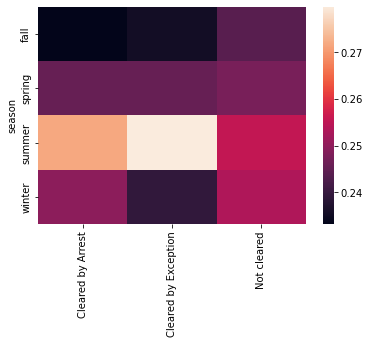

In [98]:
sns.heatmap(normalized_df)

As we can see from the below barchart, the distribution of clearance status is very disproportional. Not cleared get a much higher proportion than the other two. So we should be careful when considering the metrics of measuring the model's performance. For example, if we choose accuracy, the model will get a high score for predicting every cases as not cleared.

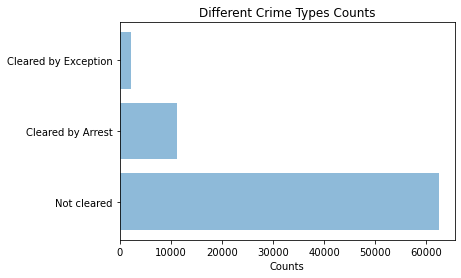

In [99]:
status_counts = df['clearance_status'].value_counts()
y_pos = np.arange(len(status_counts))
objects = status_counts.index
performance = status_counts.values

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Counts')
plt.title('Different Crime Types Counts')
plt.show()

In [100]:
df['primary_type'].value_counts()

Theft                                           26673
Theft: All Other Larceny                        12961
Theft: BOV                                      10300
Burglary /                                       5546
Burglary                                         4852
Auto Theft                                       4164
Theft: Shoplifting                               3901
Agg Assault                                      1839
Aggravated Assault                               1832
Robbery                                          1669
Rape                                             1006
Theft: Pocket Picking                             431
Theft: Auto Parts                                 228
Theft: from Building                              217
Theft: Coin Op Machine                            150
Homicide: Murder & Nonnegligent Manslaughter       25
Murder                                             18
Theft: Purse Snatching                              7
Name: primary_type, dtype: i

In [101]:
def type_convert(x):
    if pd.isna(x):
        return 'Others'
    elif 'Theft' in x:
        return 'Theft'
    elif 'Burglary'in x:
        return 'Burglary'
    elif 'Murder' in x:
        return 'Murder'
    elif 'Assault' in x:
        return 'Assault'
    else:
        return x
        

df['primary_type'] = df['primary_type'].apply(type_convert)

For some primary types such as Assault, we can see that not cleared no longer becomes the dominated category, while not cleared is still the vast majority. This indicated that primary type might be a good feature to distinguish the clearance status.

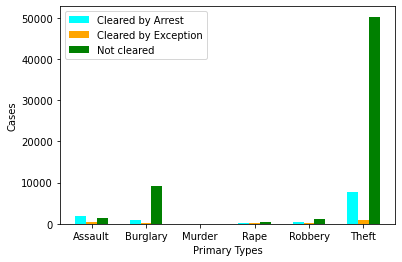

In [102]:
# create data
grouped_data = df.groupby(['primary_type', 'clearance_status']).size()\
                 .to_frame().rename(columns={0:'counts'}).reset_index()

x = np.arange(len(grouped_data['primary_type'].unique()))
y1 = grouped_data[grouped_data['clearance_status'] == 'Cleared by Arrest']['counts'].values
y2 = grouped_data[grouped_data['clearance_status'] == 'Cleared by Exception']['counts'].values
y3 = grouped_data[grouped_data['clearance_status'] == 'Not cleared']['counts'].values
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, grouped_data['primary_type'].unique())
plt.xlabel("Primary Types")
plt.ylabel("Cases")
plt.legend(["Cleared by Arrest", "Cleared by Exception", "Not cleared"])
plt.show()

From the below plots, we can see that for each clearance status type, the location distributions share a similar shape. Most of the points are clustered in the bottom-right corner for all clearance status, while the density of the cluster in the bottom-right corner is gradually decreasing from Not cleared to Cleared by arrest, then to Cleared by Exception.

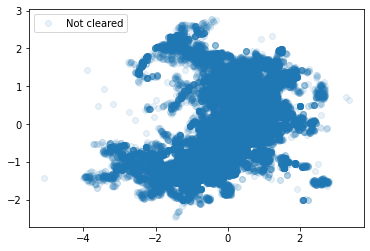

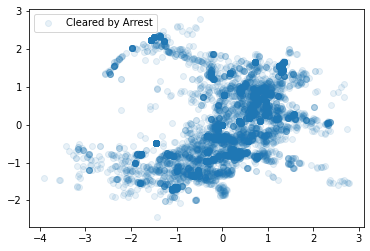

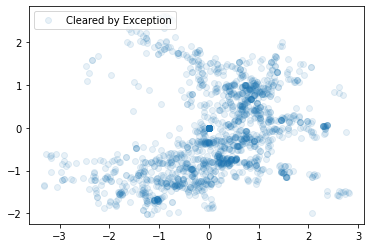

In [103]:
df['x_standardized'] = ((df['x_coordinate'] - np.mean(df['x_coordinate'])) / np.std(df['x_coordinate'])).fillna(0)
df['y_standardized'] = ((df['y_coordinate'] - np.mean(df['y_coordinate'])) / np.std(df['y_coordinate'])).fillna(0)

not_cleared = df[df["clearance_status"] == 'Not cleared']
plt.plot(not_cleared["x_standardized"], not_cleared["y_standardized"], marker="o", linestyle="", alpha = 0.1)
plt.legend(["Not cleared"], loc='upper left')
plt.show()

cleared_arrest = df[df["clearance_status"] == 'Cleared by Arrest']
plt.plot(cleared_arrest["x_standardized"], cleared_arrest["y_standardized"], marker="o", linestyle="", alpha = 0.1)
plt.legend(['Cleared by Arrest'], loc='upper left')
plt.show()

cleared_exception = df[df["clearance_status"] == 'Cleared by Exception']
plt.plot(cleared_exception["x_standardized"], cleared_exception["y_standardized"], marker="o", linestyle="", alpha = 0.1)
plt.legend(['Cleared by Exception'], loc='upper left')
plt.show()

###  Further Cleaning & Feature Engineering

In [104]:
# transform date columns to datatime object
df = df.assign(clearance_date = pd.to_datetime(df.clearance_date), timestamp = pd.to_datetime(df.timestamp))

In [105]:
def clear_time(row):
    if (row['year'] > 0) == False :
        row['year'] = row['clearance_date'].year
    return row

df = df.apply(clear_time, axis = 1)

In [106]:
def description_convert(x):
    if pd.isna(x):
        return 'others'
    elif 'theft' in x:
        return 'theft'
    elif 'burglary'in x:
        return 'burglary'
    elif 'murder' in x:
        return 'murder'
    elif 'assault' in x or 'aslt' in x:
        return 'assault'
    elif 'robbery' in x:
        return 'robbery'
    elif 'rape' in x:
        return 'rape'
    elif 'deadly conduct' in x:
        return 'deadly conduct'
    else:
        return x

In [107]:
df = df.drop(['address', 
              'location', 
              'location_description', 
              'clearance_date', 
              'timestamp', 
              'x_coordinate', 
              'y_coordinate',
              'unique_key', 
              'zipcode'], axis = 1)

# replace null values with 0
df['latitude'] = df['latitude'].fillna(0)
df['longitude'] = df['longitude'].fillna(0)
df['council_district_code'] = df['council_district_code'].fillna(0)
df['census_tract'] = df['census_tract'].fillna(0)

# convert description columns to shorter strings
df['description'] = df['description'].str.lower().apply(description_convert)

df.head() #show cleaned data set

,census_tract,clearance_status,council_district_code,description,district,latitude,longitude,primary_type,year,month,season,x_standardized,y_standardized
0,6.03,Not cleared,9.0,theft,B,0.000000,0.000000,Theft,2015.0,12,winter,-0.153236,-0.022620
1,24.21,Cleared by Arrest,5.0,theft,F,0.000000,0.000000,Theft,2015.0,9,fall,-1.102416,-1.689434
4,3.02,Cleared by Arrest,9.0,theft,B,30.298356,-97.719647,Theft,2014.0,7,summer,0.373831,0.087118
5,24.03,Cleared by Arrest,3.0,theft,D,0.000000,0.000000,Theft,2015.0,1,winter,-0.356468,-0.965151
6,24.13,Not cleared,2.0,burglary,F,0.000000,0.000000,Theft,2015.0,8,summer,-0.053745,-1.297664


## Explore Correlation
Here, our null hypothesis is the selected two columns for comparison are not related to each other. 
We will use Chi-Sq Test to access the probability of our null hypothesis being true.

#### Correlation between crime type and clearance status

In [110]:
crostab_1 = pd.crosstab(index=df['clearance_status'], columns=df['primary_type'])
chisquare_result1 = chi2_contingency(crostab_1)
print('P value of the chi square test is ', chisquare_result1[1])

P value of the chi square test is  0.0


#### Correlation between year and clearance status 

In [111]:
crostab_2 = pd.crosstab(index=df['clearance_status'], columns=df['year'])
chisquare_result2 = chi2_contingency(crostab_2)
print('P value of the chi square test is ', chisquare_result2[1])

P value of the chi square test is  2.7906173663252498e-06


#### Correlation between month and clearance status

In [112]:
crostab_3 = pd.crosstab(index=df['clearance_status'], columns=df['month'])
chisquare_result3 = chi2_contingency(crostab_3)
print('P value of the chi square test is ', chisquare_result3[1])

P value of the chi square test is  0.0006141641755721265


#### Correlation between season and clearance status

In [113]:
crostab_4 = pd.crosstab(index=df['clearance_status'], columns=df['season'])
chisquare_result4 = chi2_contingency(crostab_4)
print('P value of the chi square test is ', chisquare_result4[1])

P value of the chi square test is  0.002300519026222643


### Summary of correlation tests:

The four chi square tests all have p-values less than 0.05. Therefore, we are able to reject the null hypothesis for the four cases and conclude that there are correlations between crime type, year, month, season and clearance status.

Note: The results from these chi square tests are affected by the nature of our dataset. We offered our interpretation of these results in our discussion section.

## Model Selection

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('clearance_status', axis = 1), 
                                                    df['clearance_status'], 
                                                    random_state=42)
cats = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])
ct = ColumnTransformer([("one_hot", cats, ['description', 'primary_type', 'district','season'])], remainder='passthrough')

In [27]:
X = df.drop('clearance_status', axis = 1)
y = df['clearance_status']

### Baseline Model: Logistic Regression

__Logistic Regression (default)__

In [28]:
model_bl = Pipeline([('feats', ct), ('lr', LogisticRegression(multi_class='multinomial', max_iter = 1000))])
model_bl.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('lr',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [29]:
pred_train = model_bl.predict(X_train)
pred_test = model_bl.predict(X_test)
accuracy_train = accuracy_score(pred_train, y_train)
accuracy_test = accuracy_score(pred_test, y_test)
print(accuracy_train, accuracy_test)

0.830472706809229 0.8325507781587972


__Logistic Regression (gridsearchcv)__

In [27]:
parameters = {'lr__C':[0.01,0.5, 1, 10]}
gs = GridSearchCV(model_bl, parameters)
gs.fit(X_train, y_train)
print(gs.cv_results_)

{'mean_fit_time': array([9.7962688 , 9.69478712, 9.69494505, 9.60914464]), 'std_fit_time': array([0.14190785, 0.06463217, 0.08628177, 0.04694502]), 'mean_score_time': array([0.0346808 , 0.03462009, 0.03445234, 0.03440299]), 'std_score_time': array([0.00032313, 0.0002334 , 0.00042786, 0.00014384]), 'param_lr__C': masked_array(data=[0.01, 0.5, 1, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'lr__C': 0.01}, {'lr__C': 0.5}, {'lr__C': 1}, {'lr__C': 10}], 'split0_test_score': array([0.83258595, 0.83293766, 0.83249802, 0.83399279]), 'split1_test_score': array([0.82977227, 0.83012398, 0.82950849, 0.8298602 ]), 'split2_test_score': array([0.83073947, 0.8317946 , 0.83056362, 0.83109118]), 'split3_test_score': array([0.82757408, 0.82704651, 0.82739822, 0.8273103 ]), 'split4_test_score': array([0.83239536, 0.83186775, 0.83292297, 0.83037285]), 'mean_test_score': array([0.83061342, 0.8307541 , 0.83057826, 0.83052546]), 'std_test_

In [28]:
pred_train_2 = gs.predict(X_train)
pred_test_2 = gs.predict(X_test)
accuracy_train_2 = accuracy_score(pred_train_2, y_train)
accuracy_test_2 = accuracy_score(pred_test_2, y_test)
print(accuracy_train_2, accuracy_test_2)

0.8310178671918964 0.8331310999736218


split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score


([<matplotlib.axis.XTick at 0x7f9282d22910>,
 [Text(0, 0, '0.01'), Text(1, 0, '0.5'), Text(2, 0, '1'), Text(3, 0, '10')])

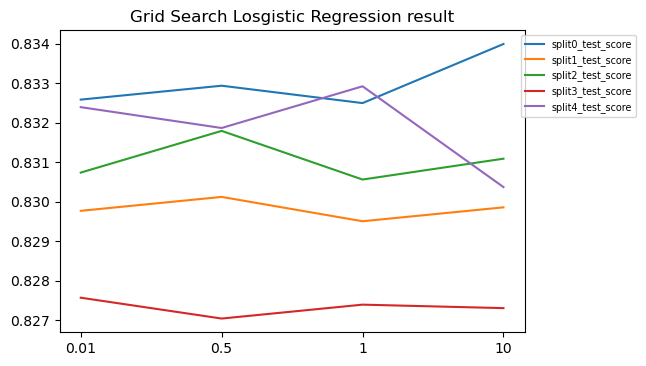

In [29]:
keys = list(gs.cv_results_.keys())[6:11]
lsgs_result = []

plt.figure(dpi=100)
plt.title('Grid Search Losgistic Regression result')
for k in keys:
    print(k)
    line = gs.cv_results_[k]
    plt.plot(line)
plt.legend(keys, fontsize = 'x-small', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks([0,1,2,3],[0.01,0.5, 1, 10])

### Other Models

__Decision Tree__

In [30]:
model_dt = Pipeline([('feats', ct), ('dt', DecisionTreeClassifier(random_state=0))])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('dt', DecisionTreeClassifier(random_state=0))])

In [31]:
pred_train_3 = model_dt.predict(X_train)
pred_test_3 = model_dt.predict(X_test)
accuracy_train_3 = accuracy_score(pred_train_3, y_train)
accuracy_test_3 = accuracy_score(pred_test_3, y_test)
print(accuracy_train_3, accuracy_test_3)

0.9612056837366347 0.8064362964916908


__SVM__

In [33]:
model_dt = Pipeline([('feats', ct), ('dt', SVC(random_state=0))])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('dt', SVC(random_state=0))])

In [35]:
pred_train_4 = model_dt.predict(X_train)
pred_test_4 = model_dt.predict(X_test)
accuracy_train_4 = accuracy_score(pred_train_4, y_train)
accuracy_test_4 = accuracy_score(pred_test_4, y_test)
print(accuracy_train_4, accuracy_test_4)

0.823297692740574 0.8259034555526247


__KNN__

In [34]:
model_dt = Pipeline([('feats', ct), ('dt', KNeighborsClassifier())])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('dt', KNeighborsClassifier())])

In [35]:
pred_train_5 = model_dt.predict(X_train)
pred_test_5 = model_dt.predict(X_test)
accuracy_train_5 = accuracy_score(pred_train_5, y_train)
accuracy_test_5 = accuracy_score(pred_test_5, y_test)
print(accuracy_train_5, accuracy_test_5)

0.870234243106359 0.8389343181218676


__Multi-layer Perceptron__

In [36]:
model_dt = Pipeline([('feats', ct), ('dt', MLPClassifier(random_state=0))])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('dt', MLPClassifier(random_state=0))])

In [37]:
pred_train_6 = model_dt.predict(X_train)
pred_test_6 = model_dt.predict(X_test)
accuracy_train_6 = accuracy_score(pred_train_6, y_train)
accuracy_test_6 = accuracy_score(pred_test_6, y_test)
print(accuracy_train_6, accuracy_test_6)

0.8225415025323579 0.8255341598522817


__Random Forest__

In [38]:
model_dt = Pipeline([('feats', ct), ('dt', RandomForestClassifier())])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('dt', RandomForestClassifier())])

In [39]:
pred_train_7 = model_dt.predict(X_train)
pred_test_7 = model_dt.predict(X_test)
accuracy_train_7 = accuracy_score(pred_train_7, y_train)
accuracy_test_7 = accuracy_score(pred_test_7, y_test)
print(accuracy_train_7, accuracy_test_7)

0.9611529262802476 0.8523872329200739


__LightGBM__

In [28]:
d_train=Dataset(X_train, label=y_train)
model_dt = Pipeline([('feats', ct), ('dt',LGBMClassifier(n_jobs=-1))])
start = time.time()
model_dt.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.8217723369598389s


In [29]:
pred_train_8 = model_dt.predict(X_train)
pred_test_8 = model_dt.predict(X_test)
accuracy_train_8 = accuracy_score(pred_train_8, y_train)
accuracy_test_8 = accuracy_score(pred_test_8, y_test)
print(accuracy_train_8, accuracy_test_8)

0.8705332020258864 0.8617251384858876


## Fine tune on Random Forest and LightGBM

In [45]:
def evaluate_model(model, X, y, n_splits, repeats): # prepare the cross-validation procedure 
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats) 
    
    scoring = {'acc': 'accuracy',
           'f1_macro': 'f1_macro',
           'roc_auc_ovr': 'roc_auc_ovr'}
    
    # evaluate model 
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    return scores

### Fine Tune on RF
We will use Randomized search to find the top 3 models on accuracy for random forest. 

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Tree growing and split policy
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__criterion': criterion,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

{'rf__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'rf__max_features': ['auto', 'sqrt'], 'rf__criterion': ['gini', 'entropy'], 'rf__max_depth': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300, None], 'rf__min_samples_split': [2, 5, 10, 20, 50], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


In [57]:
# Random search of parameters, using 3 fold cross validation,
# The total grids will be 10x10x2x2x5x3x2 = 12000, therefore, we will
# search across 100 different combinations, and use all available cores
rf = RandomForestClassifier()

clf = Pipeline([('feats', ct), ('rf', rf)])
rf_random = RandomizedSearchCV(estimator=clf,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1,
                               scoring='accuracy')
start = time.time()
rf_random.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training time: 1213.6068387031555s


In [59]:
# indexing the top 3 accurate models
np.argsort(rf_random.cv_results_['mean_test_score'])[-3:]

array([76, 39, 15], dtype=int64)

In [60]:
rf_random.cv_results_['params'][76], rf_random.cv_results_['mean_test_score'][76]

({'rf__n_estimators': 200,
  'rf__min_samples_split': 10,
  'rf__min_samples_leaf': 2,
  'rf__max_features': 'auto',
  'rf__max_depth': None,
  'rf__criterion': 'gini',
  'rf__bootstrap': True},
 0.8625014837969375)

In [61]:
rf_random.cv_results_['params'][15], rf_random.cv_results_['mean_test_score'][39]

({'rf__n_estimators': 300,
  'rf__min_samples_split': 20,
  'rf__min_samples_leaf': 1,
  'rf__max_features': 'sqrt',
  'rf__max_depth': 171,
  'rf__criterion': 'gini',
  'rf__bootstrap': True},
 0.8626729447763752)

In [62]:
rf_random.cv_results_['params'][6], rf_random.cv_results_['mean_test_score'][15]

({'rf__n_estimators': 250,
  'rf__min_samples_split': 20,
  'rf__min_samples_leaf': 1,
  'rf__max_features': 'auto',
  'rf__max_depth': 267,
  'rf__criterion': 'entropy',
  'rf__bootstrap': True},
 0.8626729447763753)

In [63]:
# train the model using the optimal hyperparameters and having a primary result
top3_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 200,
                                                                   min_samples_split = 10,
                                                                   min_samples_leaf = 2,
                                                                   max_features = 'auto',
                                                                   max_depth = None,
                                                                   criterion = 'gini',
                                                                   bootstrap = True))])

top2_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 300,
                                                                   min_samples_split = 20,
                                                                   min_samples_leaf = 1,
                                                                   max_features = 'sqrt',
                                                                   max_depth = 171,
                                                                   criterion = 'gini',
                                                                   bootstrap = True))])

top1_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 250,
                                                                   min_samples_split = 20,
                                                                   min_samples_leaf = 1,
                                                                   max_features = 'auto',
                                                                   max_depth = 267,
                                                                   criterion = 'entropy',
                                                                   bootstrap = True))])
top1_model.fit(X_train, y_train)
top2_model.fit(X_train, y_train)
top3_model.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('rf',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=200))])

In [64]:
f_scores = []
accs = []
aucs = []

top1_f = f1_score(y_test, top1_model.predict(X_test), average='macro')
top2_f = f1_score(y_test, top2_model.predict(X_test), average='macro')
top3_f = f1_score(y_test, top3_model.predict(X_test), average='macro')

top1_acc = accuracy_score(y_test, top1_model.predict(X_test))
top2_acc = accuracy_score(y_test, top2_model.predict(X_test))
top3_acc = accuracy_score(y_test, top3_model.predict(X_test))

top1_auc = roc_auc_score(y_test, top1_model.predict_proba(X_test), multi_class="ovr")
top2_auc = roc_auc_score(y_test, top2_model.predict_proba(X_test), multi_class="ovr")
top3_auc = roc_auc_score(y_test, top3_model.predict_proba(X_test), multi_class="ovr")


f_scores = [top1_f, top2_f, top3_f]
accs = [top1_acc, top2_acc, top3_acc]
auc = [top1_auc, top2_auc, top3_auc]

print('F_1 Scores: ' + str(f_scores))
print('Accuracy Scores: ' + str(accs))
print('Multiclass AUC ovr: ' + str(auc))

F_1 Scores: [0.501320499054308, 0.4996625418451826, 0.5065278589716019]
Accuracy Scores: [0.863677130044843, 0.864046425745186, 0.8639409126879452]
Multiclass AUC ovr: [0.8345847396815911, 0.8344077690177555, 0.8315870093422809]


### Significance Test for RF Model Performance 
We will use 5x5 repreated cross validation to create models distribution, and conduct null hypothesis test with our three metrics.

In [72]:
top3_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 200,
                                                                   min_samples_split = 10,
                                                                   min_samples_leaf = 2,
                                                                   max_features = 'auto',
                                                                   max_depth = None,
                                                                   criterion = 'gini',
                                                                   bootstrap = True))])

top2_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 300,
                                                                   min_samples_split = 20,
                                                                   min_samples_leaf = 1,
                                                                   max_features = 'sqrt',
                                                                   max_depth = 171,
                                                                   criterion = 'gini',
                                                                   bootstrap = True))])

top1_model = Pipeline([('feats', ct), ('rf', RandomForestClassifier(n_estimators = 250,
                                                                   min_samples_split = 20,
                                                                   min_samples_leaf = 1,
                                                                   max_features = 'auto',
                                                                   max_depth = 267,
                                                                   criterion = 'entropy',
                                                                   bootstrap = True))])

In [73]:
# configurations to test
repeats = 5
n_split = 5
# evaluate using a given number of repeats
scores_1 = evaluate_model(top1_model, X, y, n_split, repeats)
scores_2 = evaluate_model(top2_model, X, y, n_split, repeats)
scores_3 = evaluate_model(top3_model, X, y, n_split, repeats)

In [74]:
test_acc_RF_1 = scores_1['test_acc']
test_f1_RF_1 = scores_1['test_f1_macro']
test_auc_RF_1 = scores_1['test_roc_auc_ovr']

test_acc_RF_2 = scores_2['test_acc']
test_f1_RF_2 = scores_2['test_f1_macro']
test_auc_RF_2 = scores_2['test_roc_auc_ovr']

test_acc_RF_3 = scores_3['test_acc']
test_f1_RF_3 = scores_3['test_f1_macro']
test_auc_RF_3 = scores_3['test_roc_auc_ovr']

In [75]:
print('Mean Accuracy RF: ' + str(np.mean(test_acc_RF_1)) + ' , ' + str(np.mean(test_acc_RF_2)) + ' , ' + str(np.mean(test_acc_RF_3)))
print('Mean F1 RF: ' + str(np.mean(test_f1_RF_1)) + ' , ' + str(np.mean(test_f1_RF_2)) + ' , ' + str(np.mean(test_f1_RF_3)))
print('Mean AUC RF: ' + str(np.mean(test_auc_RF_1)) + ' , ' + str(np.mean(test_auc_RF_2)) + ' , ' + str(np.mean(test_auc_RF_3)))

Mean Accuracy RF: 0.8627125275601369 , 0.8629262189874689 , 0.8625885471084086
Mean F1 RF: 0.5043843606494408 , 0.5042854171922214 , 0.5117423527376923
Mean AUC RF: 0.8288699123470801 , 0.8288092026744758 , 0.8265966939111224


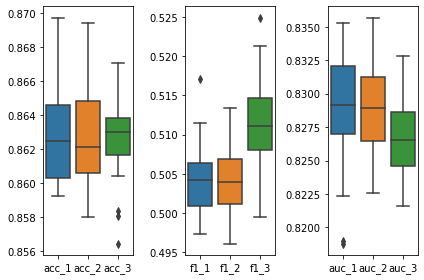

In [76]:
temp_acc = pd.DataFrame({'acc_1': test_acc_RF_1, 'acc_2': test_acc_RF_2, 'acc_3':test_acc_RF_3})
temp_f1 = pd.DataFrame({'f1_1': test_f1_RF_1, 'f1_2': test_f1_RF_2, 'f1_3':test_f1_RF_3})
temp_auc = pd.DataFrame({'auc_1': test_auc_RF_1, 'auc_2': test_auc_RF_2, 'auc_3':test_auc_RF_3})

fig, axes = plt.subplots(1, 3)
sns.boxplot(data = temp_acc, ax=axes[0])
sns.boxplot(data = temp_f1, ax=axes[1])
sns.boxplot(data = temp_auc, ax=axes[2])
fig.tight_layout()

#### Null hypothesis tests on accuracy
##### Unpaired t-test

In [38]:
stats.ttest_ind(test_acc_RF_1, test_acc_RF_2, equal_var=False)

Ttest_indResult(statistic=0.24089938573571482, pvalue=0.8106595272524533)

In [39]:
stats.ttest_ind(test_acc_RF_1, test_acc_RF_3, equal_var=False)

Ttest_indResult(statistic=0.27541481409626256, pvalue=0.7841826800687759)

In [40]:
stats.ttest_ind(test_acc_RF_2, test_acc_RF_3, equal_var=False)

Ttest_indResult(statistic=0.031277285960608824, pvalue=0.9751782172192103)

##### Wilcoxon signed-rank test

In [41]:
stats.wilcoxon(test_acc_RF_1, test_acc_RF_2)

WilcoxonResult(statistic=160.5, pvalue=0.9578450322151184)

In [42]:
stats.wilcoxon(test_acc_RF_1, test_acc_RF_3)

WilcoxonResult(statistic=147.5, pvalue=0.943053770411126)

In [43]:
stats.wilcoxon(test_acc_RF_2, test_acc_RF_3)

WilcoxonResult(statistic=158.0, pvalue=0.9158032536506653)

Both tests have shown no significant difference of accuracy between 3 models.

#### Null hypothesis tests on f1 score
##### Unpaired t-test

In [44]:
stats.ttest_ind(test_f1_RF_1, test_f1_RF_2, equal_var=False)

Ttest_indResult(statistic=0.08354030534484155, pvalue=0.933774841948745)

In [45]:
stats.ttest_ind(test_f1_RF_1, test_f1_RF_3, equal_var=False)

Ttest_indResult(statistic=-3.8488953164400277, pvalue=0.0003561735453572278)

In [46]:
stats.ttest_ind(test_f1_RF_2, test_f1_RF_3, equal_var=False)

Ttest_indResult(statistic=-3.708128352044634, pvalue=0.0005411479628639203)

##### Wilcoxon signed-rank test

In [47]:
stats.wilcoxon(test_f1_RF_1, test_f1_RF_2)

WilcoxonResult(statistic=147.0, pvalue=0.6915188431739807)

In [48]:
stats.wilcoxon(test_f1_RF_1, test_f1_RF_3)

WilcoxonResult(statistic=43.0, pvalue=0.0007149577140808105)

In [49]:
stats.wilcoxon(test_f1_RF_2, test_f1_RF_3)

WilcoxonResult(statistic=40.0, pvalue=0.0004894733428955078)

Both tests have shown significant difference of f1 score between 3 models. Namely, the f1 score of model 3 is significantly better than model 1 & 2.

#### Null hypothesis tests on AUC
##### Unpaired t-test

In [50]:
stats.ttest_ind(test_auc_RF_1, test_auc_RF_2, equal_var=False)

Ttest_indResult(statistic=-0.5788457684505799, pvalue=0.5654303400703964)

In [51]:
stats.ttest_ind(test_auc_RF_1, test_auc_RF_3, equal_var=False)

Ttest_indResult(statistic=1.583940102500046, pvalue=0.12017643723228492)

In [52]:
stats.ttest_ind(test_auc_RF_2, test_auc_RF_3, equal_var=False)

Ttest_indResult(statistic=2.1401146112106013, pvalue=0.038075123491500905)

##### Wilcoxon signed-rank test

In [53]:
stats.wilcoxon(test_auc_RF_1, test_auc_RF_2)

WilcoxonResult(statistic=135.0, pvalue=0.4741646647453308)

In [54]:
stats.wilcoxon(test_auc_RF_1, test_auc_RF_3)

WilcoxonResult(statistic=102.0, pvalue=0.10731470584869385)

In [55]:
stats.wilcoxon(test_auc_RF_2, test_auc_RF_3)

WilcoxonResult(statistic=85.0, pvalue=0.036682069301605225)

The model 3 has a significant lower AUC compared to model 1 & 2.

#### Summary for RF Fine tuning

According to the result of our 5x5 repeated cross validation on top 3 RF models, we conducted the unpaired t-test as well as Wilcoxon signed-rank test to prove the significant differences between their perfomances. To sum up, the accuracy has shown no significant differences while model 3 has a significantly bigger F1 score, and significant lower AUC than model 1 & 2. However, the difference of AUC is not huge. That is to say, model 3 is generally better and has a better performance of predicting under our imbalanced dataset.

### Fine Tune on LightGBM

In [28]:
random_grid = {
    'lgb__n_estimators': [200, 400, 700, 1000],
    'lgb__colsample_bytree': [0.7, 0.8, 0.9],
    'lgb__max_depth': [15,20,25,30, None],
    'lgb__num_leaves': [20,40,60,80,100],
    'lgb__min_child_samples':[5,10,15],
    'lgb__reg_alpha': [1.1, 1.2, 1.3],
    'lgb__reg_lambda': [1.1, 1.2, 1.3],
    'lgb__learning_rate':[0.05,0.1,0.2],
    'lgb__min_split_gain': [0.3, 0.4],
    'lgb__subsample': [0.7, 0.8, 0.9],
    'lgb__subsample_freq': [20]
}


In [35]:
# Grid search of parameters, using 3 fold cross validation,
# The total grids will be 4x3x5x5x3x3x3x2x3 = 48600, therefore we will
# search across 500 different combinations, and use all available cores
lgb = LGBMClassifier()

clf = Pipeline([('feats', ct), ('lgb', lgb)])
lgb_random = RandomizedSearchCV(estimator=clf,
                               param_distributions=random_grid,
                               n_iter=500,
                               cv=3,
                               verbose=2,
                               n_jobs=-1,
                               scoring='accuracy')
start = time.time()
lgb_random.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Training time: 1356.1092278957367s


In [36]:
# indexing the top 3 accurate models
np.argsort(lgb_random.cv_results_['mean_test_score'])[-3:]

array([ 56, 456, 250], dtype=int64)

In [37]:
lgb_random.cv_results_['params'][56], lgb_random.cv_results_['mean_test_score'][56]

({'lgb__subsample_freq': 20,
  'lgb__subsample': 0.8,
  'lgb__reg_lambda': 1.1,
  'lgb__reg_alpha': 1.1,
  'lgb__num_leaves': 100,
  'lgb__n_estimators': 700,
  'lgb__min_split_gain': 0.3,
  'lgb__min_child_samples': 5,
  'lgb__max_depth': 20,
  'lgb__learning_rate': 0.05,
  'lgb__colsample_bytree': 0.9},
 0.8637676571835556)

In [38]:
lgb_random.cv_results_['params'][456], lgb_random.cv_results_['mean_test_score'][456]

({'lgb__subsample_freq': 20,
  'lgb__subsample': 0.8,
  'lgb__reg_lambda': 1.3,
  'lgb__reg_alpha': 1.3,
  'lgb__num_leaves': 100,
  'lgb__n_estimators': 400,
  'lgb__min_split_gain': 0.3,
  'lgb__min_child_samples': 5,
  'lgb__max_depth': 20,
  'lgb__learning_rate': 0.05,
  'lgb__colsample_bytree': 0.7},
 0.8637940357957768)

In [39]:
lgb_random.cv_results_['params'][250], lgb_random.cv_results_['mean_test_score'][250]

({'lgb__subsample_freq': 20,
  'lgb__subsample': 0.8,
  'lgb__reg_lambda': 1.3,
  'lgb__reg_alpha': 1.1,
  'lgb__num_leaves': 80,
  'lgb__n_estimators': 700,
  'lgb__min_split_gain': 0.3,
  'lgb__min_child_samples': 10,
  'lgb__max_depth': 20,
  'lgb__learning_rate': 0.05,
  'lgb__colsample_bytree': 0.7},
 0.8638072251018875)

In [40]:
# train the model using the optimal hyperparameters and having a primary result
top3_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.1,
                                           reg_alpha=1.1,
                                           num_leaves=100,
                                           n_estimators=700,
                                           min_split_gain=0.3,
                                           min_child_samples=5,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.9))])

top2_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.3,
                                           reg_alpha=1.3,
                                           num_leaves=100,
                                           n_estimators=400,
                                           min_split_gain=0.3,
                                           min_child_samples=5,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.7))])

top1_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.3,
                                           reg_alpha=1.1,
                                           num_leaves=80,
                                           n_estimators=700,
                                           min_split_gain=0.3,
                                           min_child_samples=10,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.7))])
top1_model_lgb.fit(X_train, y_train)
top2_model_lgb.fit(X_train, y_train)
top3_model_lgb.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['description',
                                                   'primary_type', 'district',
                                                   'season'])])),
                ('lgb',
                 LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05,
                                max_depth=20, min_child_samples=5,
                                min_split_gain=0.3, n_estimators=700,
                                num_leaves=100, reg_alpha=1.1, reg_lambda=1.1,
                                subsample=0.8, su

In [42]:
f_scores = []
accs = []
aucs = []

top1_f_lgb = f1_score(y_test, top1_model_lgb.predict(X_test), average='macro')
top2_f_lgb = f1_score(y_test, top2_model_lgb.predict(X_test), average='macro')
top3_f_lgb = f1_score(y_test, top3_model_lgb.predict(X_test), average='macro')

top1_acc_lgb = accuracy_score(y_test, top1_model_lgb.predict(X_test))
top2_acc_lgb = accuracy_score(y_test, top2_model_lgb.predict(X_test))
top3_acc_lgb = accuracy_score(y_test, top3_model_lgb.predict(X_test))

top1_auc_lgb = roc_auc_score(y_test, top1_model_lgb.predict_proba(X_test), multi_class="ovr")
top2_auc_lgb = roc_auc_score(y_test, top2_model_lgb.predict_proba(X_test), multi_class="ovr")
top3_auc_lgb = roc_auc_score(y_test, top3_model_lgb.predict_proba(X_test), multi_class="ovr")


f_scores = [top1_f_lgb, top2_f_lgb, top3_f_lgb]
accs = [top1_acc_lgb, top2_acc_lgb, top3_acc_lgb]
auc = [top1_auc_lgb, top2_auc_lgb, top3_auc_lgb]

print('F_1 Scores: ' + str(f_scores))
print('Accuracy Scores: ' + str(accs))
print('Multiclass AUC ovr: ' + str(auc))

F_1 Scores: [0.5175428214515828, 0.5126286276636841, 0.5203572474117854]
Accuracy Scores: [0.8645212345027697, 0.8643102083882881, 0.862410973357953]
Multiclass AUC ovr: [0.8358117181705862, 0.835860648596657, 0.8339761440106143]


### Significance Test for LightGBM Model Performance 
We will use 5x5 repreated cross validation to create models distribution, and conduct null hypothesis test with our three metrics.

In [43]:
top3_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.1,
                                           reg_alpha=1.1,
                                           num_leaves=100,
                                           n_estimators=700,
                                           min_split_gain=0.3,
                                           min_child_samples=5,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.9))])

top2_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.3,
                                           reg_alpha=1.3,
                                           num_leaves=100,
                                           n_estimators=400,
                                           min_split_gain=0.3,
                                           min_child_samples=5,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.7))])

top1_model_lgb = Pipeline([('feats', ct),
                           ('lgb',
                            LGBMClassifier(subsample_freq=20,
                                           subsample=0.8,
                                           reg_lambda=1.3,
                                           reg_alpha=1.1,
                                           num_leaves=80,
                                           n_estimators=700,
                                           min_split_gain=0.3,
                                           min_child_samples=10,
                                           max_depth=20,
                                           learning_rate=0.05,
                                           colsample_bytree=0.7))])

In [46]:
# configurations to test
repeats = 5
n_split = 5
# evaluate using a given number of repeats
scores_1_lgb = evaluate_model(top1_model_lgb, X, y, n_split, repeats)
scores_2_lgb = evaluate_model(top2_model_lgb, X, y, n_split, repeats)
scores_3_lgb = evaluate_model(top3_model_lgb, X, y, n_split, repeats)

In [47]:
test_acc_lgb_1 = scores_1_lgb['test_acc']
test_f1_lgb_1 = scores_1_lgb['test_f1_macro']
test_auc_lgb_1 = scores_1_lgb['test_roc_auc_ovr']

test_acc_lgb_2 = scores_2_lgb['test_acc']
test_f1_lgb_2 = scores_2_lgb['test_f1_macro']
test_auc_lgb_2 = scores_2_lgb['test_roc_auc_ovr']

test_acc_lgb_3 = scores_3_lgb['test_acc']
test_f1_lgb_3 = scores_3_lgb['test_f1_macro']
test_auc_lgb_3 = scores_3_lgb['test_roc_auc_ovr']

In [49]:
print('Mean Accuracy LGBM: ' + str(np.mean(test_acc_lgb_1)) + ' , ' +
      str(np.mean(test_acc_lgb_2)) + ' , ' + str(np.mean(test_acc_lgb_3)))
print('Mean F1 LGBM: ' + str(np.mean(test_f1_lgb_1)) + ' , ' +
      str(np.mean(test_f1_lgb_2)) + ' , ' + str(np.mean(test_f1_lgb_3)))
print('Mean AUC LGBM: ' + str(np.mean(test_auc_lgb_1)) + ' , ' +
      str(np.mean(test_auc_lgb_2)) + ' , ' + str(np.mean(test_auc_lgb_3)))

Mean Accuracy LGBM: 0.8626993130291386 , 0.8633034100747782 , 0.8626571050228073
Mean F1 LGBM: 0.5153069120924371 , 0.5137013598671254 , 0.5162583970675714
Mean AUC LGBM: 0.8331112895325244 , 0.8353402835651383 , 0.8335189545838935


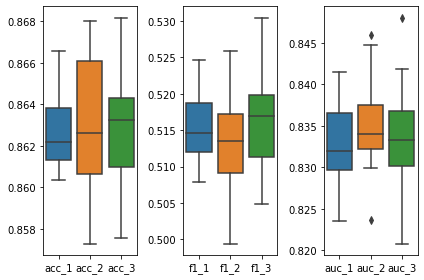

In [50]:
temp_acc = pd.DataFrame({'acc_1': test_acc_lgb_1, 'acc_2': test_acc_lgb_2, 'acc_3':test_acc_lgb_3})
temp_f1 = pd.DataFrame({'f1_1': test_f1_lgb_1, 'f1_2': test_f1_lgb_2, 'f1_3':test_f1_lgb_3})
temp_auc = pd.DataFrame({'auc_1': test_auc_lgb_1, 'auc_2': test_auc_lgb_2, 'auc_3':test_auc_lgb_3})

fig, axes = plt.subplots(1, 3)
sns.boxplot(data = temp_acc, ax=axes[0])
sns.boxplot(data = temp_f1, ax=axes[1])
sns.boxplot(data = temp_auc, ax=axes[2])
fig.tight_layout()

#### Null hypothesis tests on accuracy
##### Unpaired t-test

In [51]:
stats.ttest_ind(test_acc_lgb_1, test_acc_lgb_2, equal_var=False)

Ttest_indResult(statistic=-0.8536270901225003, pvalue=0.3987904918440963)

In [52]:
stats.ttest_ind(test_acc_lgb_1, test_acc_lgb_3, equal_var=False)

Ttest_indResult(statistic=0.06816061087871914, pvalue=0.9459865582875658)

In [53]:
stats.ttest_ind(test_acc_lgb_2, test_acc_lgb_3, equal_var=False)

Ttest_indResult(statistic=0.7985778983179942, pvalue=0.42859455673182034)

##### Wilcoxon signed-rank test

In [54]:
stats.wilcoxon(test_acc_lgb_1, test_acc_lgb_2)

WilcoxonResult(statistic=130.5, pvalue=0.39571136236190796)

In [55]:
stats.wilcoxon(test_acc_lgb_1, test_acc_lgb_3)

WilcoxonResult(statistic=154.0, pvalue=0.8325093984603882)

In [56]:
stats.wilcoxon(test_acc_lgb_2, test_acc_lgb_3)

WilcoxonResult(statistic=134.0, pvalue=0.457846462726593)

The tests have shown no significant differences in accuracy between models.

#### Null hypothesis tests on F1 score
##### Unpaired t-test

In [57]:
stats.ttest_ind(test_f1_lgb_1, test_f1_lgb_2, equal_var=False)

Ttest_indResult(statistic=1.0174052733237995, pvalue=0.31484242275360275)

In [58]:
stats.ttest_ind(test_f1_lgb_1, test_f1_lgb_3, equal_var=False)

Ttest_indResult(statistic=-0.620695331580463, pvalue=0.5381071849921288)

In [59]:
stats.ttest_ind(test_f1_lgb_2, test_f1_lgb_3, equal_var=False)

Ttest_indResult(statistic=-1.401827519232587, pvalue=0.1674118517226029)

##### Wilcoxon signed-rank test

In [60]:
stats.wilcoxon(test_f1_lgb_1, test_f1_lgb_2)

WilcoxonResult(statistic=130.0, pvalue=0.39571136236190796)

In [61]:
stats.wilcoxon(test_f1_lgb_1, test_f1_lgb_3)

WilcoxonResult(statistic=141.0, pvalue=0.5782062411308289)

In [62]:
stats.wilcoxon(test_f1_lgb_2, test_f1_lgb_3)

WilcoxonResult(statistic=111.0, pvalue=0.17295855283737183)

The tests have shown no significant differences in F1 score between models.

#### Null hypothesis tests on AUC
##### Unpaired t-test

In [65]:
stats.ttest_ind(test_auc_lgb_1, test_auc_lgb_2, equal_var=False)

Ttest_indResult(statistic=-1.6055329894967847, pvalue=0.11498145162361495)

In [66]:
stats.ttest_ind(test_auc_lgb_1, test_auc_lgb_3, equal_var=False)

Ttest_indResult(statistic=-0.2759131730324335, pvalue=0.7838419943040544)

In [67]:
stats.ttest_ind(test_auc_lgb_2, test_auc_lgb_3, equal_var=False)

Ttest_indResult(statistic=1.1898833049109991, pvalue=0.24001373537651444)

##### Wilcoxon signed-rank test

In [68]:
stats.wilcoxon(test_auc_lgb_1, test_auc_lgb_2)

WilcoxonResult(statistic=102.0, pvalue=0.10731470584869385)

In [69]:
stats.wilcoxon(test_auc_lgb_1, test_auc_lgb_3)

WilcoxonResult(statistic=159.0, pvalue=0.936802864074707)

In [70]:
stats.wilcoxon(test_auc_lgb_2, test_auc_lgb_3)

WilcoxonResult(statistic=116.0, pvalue=0.21998637914657593)

The tests have shown no significant differences in AUC between models.

#### Summary for LightGBM Fine tuning

According to the result of our 5x5 repeated cross validation on top 3 LGBM models, we conducted the unpaired t-test as well as Wilcoxon signed-rank test to prove the significant differences between their perfomances. To sum up, the accuracy, F1 score and AUC have shown no significant differences between 3 models. Their are almost identical in performance, however, model 1 has smaller variance in all three metrics. Therefore, we choose model 1 for our final comparison with random forest given its consistence.

### Significance Tests between RF and LGBM

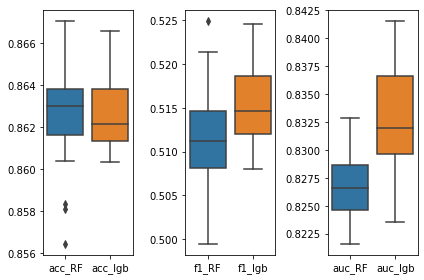

In [83]:
temp_acc = pd.DataFrame({'acc_RF': test_acc_RF_3, 'acc_lgb': test_acc_lgb_1})
temp_f1 = pd.DataFrame({'f1_RF': test_f1_RF_3, 'f1_lgb': test_f1_lgb_1})
temp_auc = pd.DataFrame({'auc_RF': test_auc_RF_3, 'auc_lgb': test_auc_lgb_1})

fig, axes = plt.subplots(1, 3)
sns.boxplot(data = temp_acc, ax=axes[0])
sns.boxplot(data = temp_f1, ax=axes[1])
sns.boxplot(data = temp_auc, ax=axes[2])
fig.tight_layout()

#### Null hypothesis tests on accuracy
##### Unpaired t-test

In [77]:
stats.ttest_ind(test_acc_RF_3, test_acc_lgb_1, equal_var=False)

Ttest_indResult(statistic=-0.18545212377411685, pvalue=0.8537553143791723)

##### Wilcoxon signed-rank test

In [78]:
stats.wilcoxon(test_acc_RF_3, test_acc_lgb_1)

WilcoxonResult(statistic=157.0, pvalue=0.8948604464530945)

The tests have shown no significant differences in accuracy between two models.

#### Null hypothesis tests on F1 score
##### Unpaired t-test

In [79]:
stats.ttest_ind(test_f1_RF_3, test_f1_lgb_1, equal_var=False)

Ttest_indResult(statistic=-2.376218084512283, pvalue=0.02197803470738666)

##### Wilcoxon signed-rank test

In [80]:
stats.wilcoxon(test_f1_RF_3, test_f1_lgb_1)

WilcoxonResult(statistic=71.0, pvalue=0.012466490268707275)

The tests have shown that LightGBM has a significantly better F1 score compared to Random Forest.

#### Null hypothesis tests on AUC
##### Unpaired t-test

In [81]:
stats.ttest_ind(test_auc_RF_3, test_auc_lgb_1, equal_var=False)

Ttest_indResult(statistic=-5.887455743394506, pvalue=6.741417440606693e-07)

##### Wilcoxon signed-rank test

In [82]:
stats.wilcoxon(test_auc_RF_3, test_auc_lgb_1)

WilcoxonResult(statistic=22.0, pvalue=3.1948089599609375e-05)

The tests have shown that LightGBM has a significantly better AUC compared to Random Forest.

#### Summary for Null tests between Random Forest and LightGBM

According to the result of our 5x5 repeated cross validation on our Random Forest and LGBM models, we conducted the unpaired t-test as well as Wilcoxon signed-rank test to prove the significant differences between their perfomances. To sum up, the accuracy have shown no significant differences between 2 models, however, LightGBM has a significant better F1 score and AUC. This proved that LightGBM model can well predict with less bias that can be potentially caused by our imbalanced dataset compared to Random Forest Classifier.